In [109]:
import gzip
import pickle
import numpy as np
from tensorflow import keras
import pandas as pd

In [110]:
from tensorflow.keras.layers import Conv2D, Dense

## Loading data

In [111]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb')) #(10000, 50, 50)
# data pre-proc
y[y != 0] -= 2 # labels from 0 to 4
X = X.reshape(X.shape[0], 50, 50, 1) / 255   # in range [0, 1]

In [112]:
X.shape

(10000, 50, 50, 1)

In [113]:
y.shape

(10000,)

Šiame data set yra 10000 paveiksliukų, kurie yra 50x50 pikselių dydžio.

In [114]:
from collections import Counter

In [115]:
Counter(y)

Counter({2.0: 1868, 4.0: 1761, 3.0: 2137, 1.0: 2853, 0.0: 1381})

Data set sudaro šios figūros, t.y. 5 klasės:\
Apskritimų: 1381 \
Trikampių: 2853 \
Keturkampių: 1868 \
Penkiakampių: 2137 \
Šešiakampių: 1761

# DNN

#### pavyzdys

In [116]:
model = keras.models.Sequential()
# All data pre-processing should be in keras model
model.add(keras.layers.Flatten(input_shape=[50, 50])) # (10000, 2500)
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# if you use categorical_crossentropy, then it expects one hot encoded output. Pridedu sparse
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 2500)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 20)                50020     
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 105       
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


In [117]:
loss = model.fit(X,y, epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 1.5010 - accuracy: 0.3874
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 1.3505 - accuracy: 0.4525
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 1.2601 - accuracy: 0.4794
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.2067 - accuracy: 0.5029
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.1708 - accuracy: 0.5107
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.1382 - accuracy: 0.5254
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.1110 - accuracy: 0.5364
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 1.0868 - accuracy: 0.5485
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 1.0640 - accuracy: 0.5592
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 1.0432 - accuracy: 0.5710

In [118]:
model.save('model.h5')

TODO: Split to train and test set

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [121]:
X_train.shape

(7500, 50, 50, 1)

In [122]:
X_test.shape

(2500, 50, 50, 1)

Train dataset: 7500\
Test dataset: 2500

Paveiksliukai iš kiekvienos klasės:

In [123]:
import matplotlib.pyplot as plt

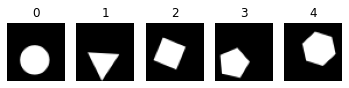

In [124]:
for i in range(5):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=1)
    plt.title(i)
    plt.axis('off')

#### 1st try

Pagrinde naudojau idėjas, panaudotas fashion MNIST užduotyje. Gavau pakankamai neblogą rezultatą, tačiau ne tokį gerą, kokį galima gauti naudojant CNN 

In [125]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[50,50]))
model1.add(keras.layers.Dense(256, activation='relu'))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(5, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.Adam(learning_rate=3e-4),
             metrics=['accuracy'])
model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 2500)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               640256    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)              

In [126]:
loss = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 1.6329 - accuracy: 0.2689 - val_loss: 1.4797 - val_accuracy: 0.4424
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 1.4945 - accuracy: 0.3572 - val_loss: 1.3684 - val_accuracy: 0.4752
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 1.4044 - accuracy: 0.4049 - val_loss: 1.2710 - val_accuracy: 0.4836
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 1.3523 - accuracy: 0.4197 - val_loss: 1.2299 - val_accuracy: 0.4848
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 1.3093 - accuracy: 0.4581 - val_loss: 1.1922 - val_accuracy: 0.4988
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 1.2635 - accuracy: 0.4671 - val_loss: 1.1647 - val_accuracy: 0.5032
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 1.2257 - accuracy: 0.4788 - val_loss: 1.1300 - val_accuracy: 0.5212
Epoch 

<AxesSubplot:>

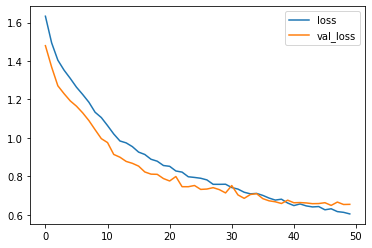

In [127]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [128]:
model1.save('model1.h5')

# CNN

#### 2nd try

In [129]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model2.add(keras.layers.BatchNormalization(axis=-1))   # Axis -1 is always the features axis
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(keras.layers.BatchNormalization(axis=-1))
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.BatchNormalization(axis=-1))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)      

In [130]:
loss = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 1.1283 - accuracy: 0.5765 - val_loss: 4.0916 - val_accuracy: 0.1896
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.4299 - accuracy: 0.8589 - val_loss: 4.5867 - val_accuracy: 0.2824
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2161 - accuracy: 0.9419 - val_loss: 0.9264 - val_accuracy: 0.6116
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1177 - accuracy: 0.9696 - val_loss: 0.3873 - val_accuracy: 0.8788
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0708 - accuracy: 0.9823 - val_loss: 0.3256 - val_accuracy: 0.9116
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0348 - accuracy: 0.9936 - val_loss: 0.2920 - val_accuracy: 0.9284
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0189 - accuracy: 0.9964 - val_loss: 0.3847 - val_accuracy: 0.8960

<AxesSubplot:>

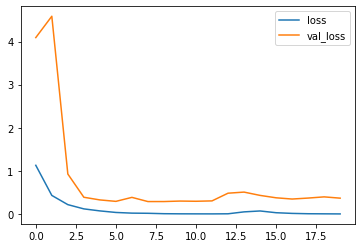

In [131]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [132]:
model2.save('model2.h5')

Pasiektas rezultatatas žymiai geresnis, nei su DNN. Pridedu papipildomų Dense sluoksnių ir MaxPooling2D stengdamasi sumažinti overfit tikimybę\
MaxPooling - mažina įvestį, sumažinant erdvinius matmenis, t.y. pagreitėja procesas

#### 3rd try

In [133]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model3.add(keras.layers.BatchNormalization(axis=-1))   # Axis -1 is always the features axis
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model3.add(keras.layers.BatchNormalization(axis=-1))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(keras.layers.BatchNormalization(axis=-1))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(8, activation='softmax'))

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_27 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
batch_normalization_28 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 11, 11, 32)      

In [134]:
loss = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
235/235 [==============================] - 3s 9ms/step - loss: 1.1043 - accuracy: 0.5772 - val_loss: 2.3435 - val_accuracy: 0.2128
Epoch 2/25
235/235 [==============================] - 2s 8ms/step - loss: 0.5344 - accuracy: 0.8101 - val_loss: 3.2128 - val_accuracy: 0.2100
Epoch 3/25
235/235 [==============================] - 2s 8ms/step - loss: 0.3000 - accuracy: 0.9101 - val_loss: 1.5658 - val_accuracy: 0.4416
Epoch 4/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1739 - accuracy: 0.9592 - val_loss: 0.3160 - val_accuracy: 0.9084
Epoch 5/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1161 - accuracy: 0.9743 - val_loss: 0.2385 - val_accuracy: 0.9472
Epoch 6/25
235/235 [==============================] - 2s 8ms/step - loss: 0.0713 - accuracy: 0.9857 - val_loss: 0.3168 - val_accuracy: 0.9052
Epoch 7/25
235/235 [==============================] - 2s 8ms/step - loss: 0.0491 - accuracy: 0.9893 - val_loss: 0.2463 - val_accuracy: 0.9400
Epoch 

<AxesSubplot:>

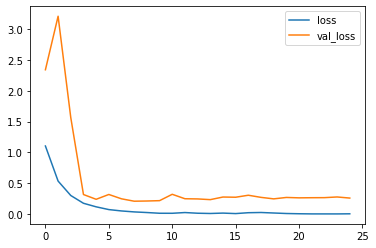

In [135]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [136]:
model3.save('model3.h5')

## Testing models

In [137]:
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

In [138]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.6566

In [139]:
model1 = keras.models.load_model('model1.h5')
evaluate('flatland_train.data', model1)

0.8146

In [140]:
pred = model2.predict(X).argmax(axis=1)
print('Accuracy on train set - {0:.02%}'.format((pred == y).mean()))

Accuracy on train set - 98.86%


In [141]:
pred = model3.predict(X).argmax(axis=1)
print('Accuracy on train set - {0:.02%}'.format((pred == y).mean()))

Accuracy on train set - 99.29%


Pastebiu, kad žymiai geresni rezultatai buvo pasiekti su CNN, tačiau nepavyko pasiekti labai gero val_loss, kokį loss pavyko pasiekti ant train set'o